In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

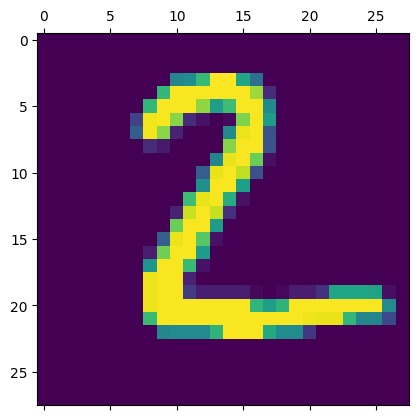

In [5]:
plt.matshow(X_test[1])

In [6]:
X_train=X_train/255
X_test=X_test/255 #model scaling

In [7]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [8]:
X_train_flattened.shape

(60000, 784)

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.4655 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2727 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9259


In [10]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.3481177e-01, 5.2473946e-03, 9.9899346e-01, 4.4936377e-01,
       4.6671250e-10, 7.7497900e-01, 8.1567460e-01, 3.9919898e-13,
       8.6108111e-02, 1.1086942e-09], dtype=float32)

In [11]:
np.argmax(y_predicted[1])

2

In [12]:
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

In [13]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [14]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [15]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [16]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'truth')

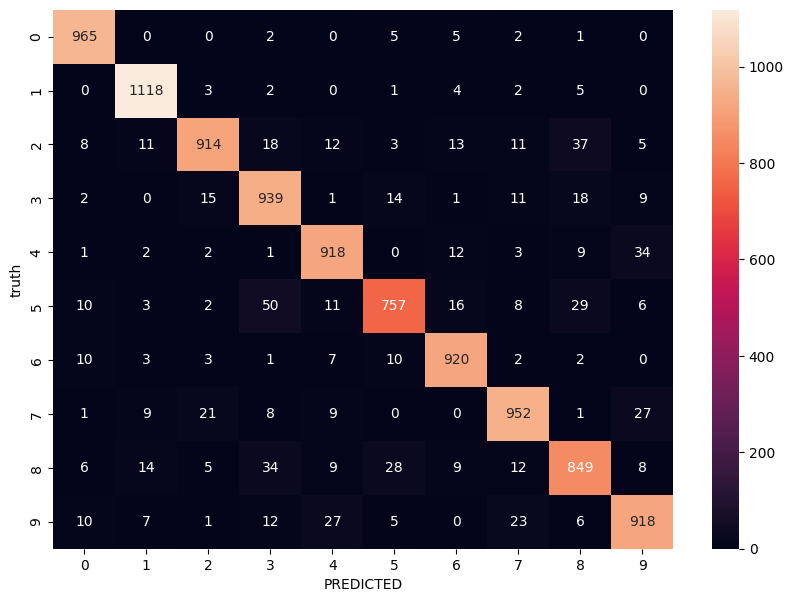

In [17]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('truth')

WITH HIDDEN LAYERS

In [18]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2724 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1232 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0661 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0527 - accuracy: 0.9837


Text(95.72222222222221, 0.5, 'truth')

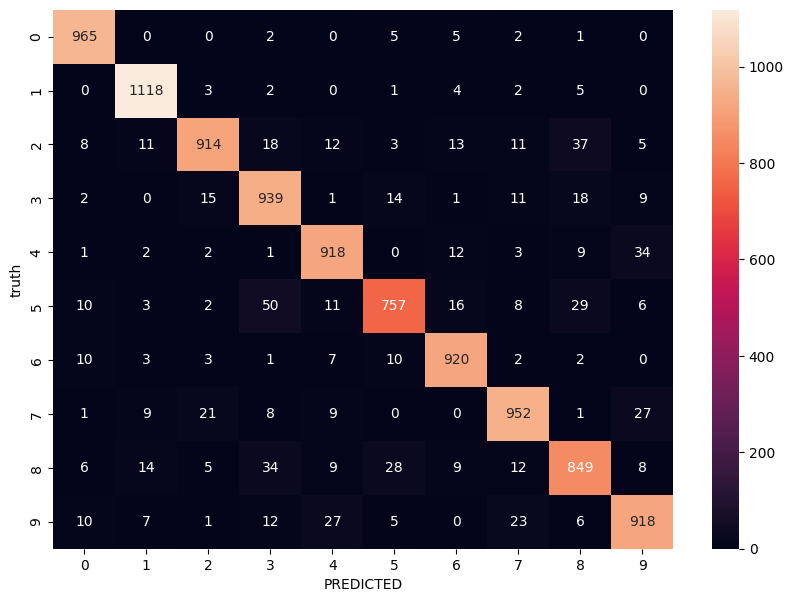

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PREDICTED')
plt.ylabel('truth')